In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
df= pd.read_csv("titanic-passengers - titanic-passengers.csv")

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S


In [72]:
df3=df

In [73]:


df3['Survived'] = df3['Survived'].replace({'No': 0, 'Yes': 1})


In [74]:
df3['Sex'] = df3['Sex'].replace({'male': 0, 'female': 1})


In [63]:
df.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [65]:
df.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,True,False


In [76]:
median_age = df3['Age'].median()


In [77]:
df3['Age'].fillna(median_age, inplace=True)


In [82]:
x = df3[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']]


In [79]:
y = df3['Survived']


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [84]:
logreg = LogisticRegression()  

In [85]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [86]:
y_pred  = logreg.predict(x_test) 

In [87]:
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt



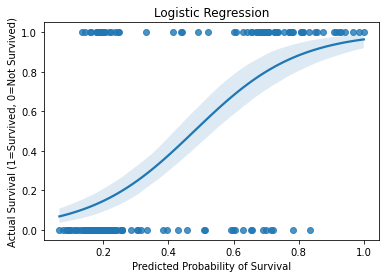

In [90]:
sns.regplot(x=logreg.predict_proba(x_test)[:,1], y=y_test, logistic=True)
plt.title('Logistic Regression')
plt.xlabel('Predicted Probability of Survival')
plt.ylabel('Actual Survival (1=Survived, 0=Not Survived)')


plt.show()


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

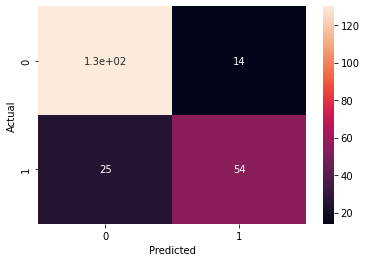

In [91]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [93]:
from sklearn.model_selection import cross_val_score


In [94]:
scores = cross_val_score(logreg, X, y, cv=5)

In [95]:
print("Accuracy scores for each fold:", scores)
print("Mean accuracy score:", scores.mean())

Accuracy scores for each fold: [0.73184358 0.83146067 0.79213483 0.7752809  0.78651685]
Mean accuracy score: 0.7834473667691922
